## Logistic Regression in Python from scratch

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
random.seed(123)

from sklearn.model_selection import train_test_split

# disable chained assignments
pd.options.mode.chained_assignment = None 

###
# Sources:
# https://beckernick.github.io/logistic-regression-from-scratch/
# https://www.askpython.com/python/examples/logistic-regression-from-scratch
# https://towardsdatascience.com/logistic-regression-from-scratch-in-python-ec66603592e2
# https://github.com/beckernick/logistic_regression_from_scratch/blob/master/logistic_regression_scratch.ipynb
# https://dhirajkumarblog.medium.com/logistic-regression-in-python-from-scratch-5b901d72d68e


In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [4]:
y = df["Survived"]
X = df[['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard','Parents/Children Aboard', 'Fare']]


In [5]:
X["Sex"] = np.where(X["Sex"] == "male", 0, 1)


In [6]:
X.head()

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [8]:
print("Shape of X_train : ", X_train.shape)
print("Shape of Y_train : ", y_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of Y_test : ", y_test.shape)


Shape of X_train :  (620, 6)
Shape of Y_train :  (620,)
Shape of X_test :  (267, 6)
Shape of Y_test :  (267,)


In [9]:
# X_train = X_train.values
# y_train = y_train.values
# X_test = X_test.values
# y_test = y_test.values


### This that is needed for a Logistic Regression algorithm:

- init weights: ${\beta}_{0}$ = 0, other weights = random

----------
#### In a loop of iterations:
- (forward) Prediction function
    - $\hat{y}$ = np.dot(X, weights) + ${\beta}_{0}$
    - Apply Sigmoid function -> $\hat{y} = sigmoid(\hat{y})$
    
    np.dot stands for matrix multiplication function
    
 
- Gradient descent, ak. the way to calculate the new weights ($dW$ and $d{\beta}_{0}$ are the gradient equations 
    of the log likelihood loss function, thus they are different than in the case of linear regression)

    - $dW = \frac {1}{m} * np.dot(X_T, (\hat{y} - y))$
    - $d{\beta}_{0} = \frac {1}{m} * \Sigma_{i=1}^{m}{(\hat{y} - y)}$


- update weights 
    - $W = W - lr * dW$
    - ${\beta}_{0} = {\beta}_{0} - lr * d{\beta}_{0}$ 
    
    where $lr$ is the predefined `learning rate`


- Instead of Mean Squared Error, we use a cost function called Cross-Entropy, also known as Log Loss. loss / error / cost calculation:
    - $loss = -\frac{1}{m} (y * \log(\hat{y}) - (1-y) * \log(1-\hat{y}))$
    
    put it in a list, for plotting it out
----------

In [10]:
def init_weights(X):
    """ Initializes the weights of the model
    """
    weights = [random.random() for _ in range(X.shape[1])]
    weights = np.array(weights)
    b0 = 0

    print("weights initialized!\n")
    print(b0, weights)
    
    return b0, weights


def predict(sample, b0, weights):
    """ Prediction function
    """
    prediction = round(np.dot(sample, weights) + b0, 3)
    prediction = sigmoid(prediction) # without this it gives linear prediction
    
    return prediction

def sigmoid(scores):
    """ Sigmoid function
    """
    return 1 / (1 + np.exp(-scores))

In [11]:
def logistic_regression_model_fit(X, y, iteration, learning_rate):
    """ Logistic regression fit function. Calculates weights based on X and y using Gradient descent
    """

    m, n = X.shape
    b0, weights = init_weights(X)
    cost_list = []
    
    for i in range(0, iteration):
        y_pred = np.dot(X, weights) + b0 # prediction
        y_pred = sigmoid(y_pred)

        # calculate the loss
        loss = -np.mean(y*(np.log(y_pred)) - (1-y)*np.log(1-y_pred))
        
        # Calculate the gradients
        d_weights = (1/m)*np.dot(X.T, (y_pred - y))
        d_b0 = (1/m)*np.sum((y_pred - y)) 
          
        # Update weights with gradient
        weights = weights - learning_rate * d_weights
        b0 = b0 - learning_rate * d_b0 
        
        cost_list.append(loss)
        
        # Print error / cost every so often
        if i % 1000 == 0:
            print("Cost: -----------------> {}".format(loss))
    
    print("\nLogistic Regression model trained.\n")
    
    return b0, weights, cost_list


In [12]:
iteration = 100000
learning_rate = 0.005

b0, weights, cost_list = logistic_regression_model_fit(X_train, y_train.values.flatten(), learning_rate = learning_rate, iteration = iteration)

weights initialized!

0 [0.0523636  0.08718668 0.40724176 0.10770023 0.90119888 0.03815367]
Cost: -----------------> -inf


/tmp/ipykernel_40971/3735444261.py:14: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_pred)) - (1-y)*np.log(1-y_pred))


Cost: -----------------> -0.2951951627033406
Cost: -----------------> -0.23734562991834657
Cost: -----------------> -0.20324229633328092
Cost: -----------------> -0.174433590639749
Cost: -----------------> -0.15004211466092374
Cost: -----------------> -0.12970177604666863
Cost: -----------------> -0.11288153901246065
Cost: -----------------> -0.09901018629404514
Cost: -----------------> -0.08756448342021816
Cost: -----------------> -0.07810125085319787
Cost: -----------------> -0.07025936646969586
Cost: -----------------> -0.06374955978752848
Cost: -----------------> -0.05834109789448641
Cost: -----------------> -0.05384926723595355
Cost: -----------------> -0.05012496138973276
Cost: -----------------> -0.04704653343281878
Cost: -----------------> -0.04451363001024555
Cost: -----------------> -0.04244260531834681
Cost: -----------------> -0.04076312891004207
Cost: -----------------> -0.03941566479657749
Cost: -----------------> -0.038349572275868535
Cost: -----------------> -0.03752164

In [13]:
print(X_train.shape)
print(weights.shape)

(620, 6)
(6,)


In [14]:
print(b0, weights)

2.0010337665772653 [-1.05876709  3.07831146 -0.0370515  -0.55905229 -0.17472939  0.01567855]


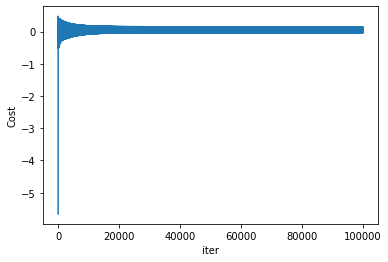

In [15]:
plt.plot(np.arange(iteration), cost_list)
plt.xlabel("iter")
plt.ylabel("Cost")
plt.show()

In [16]:
X_test2 = X_test.values.tolist()

In [17]:
# Now let's do some predictions

y_pred_proba = [] # probability estimates

for sample in X_test2:
    mod_pred = predict(sample, b0, weights)
    y_pred_proba.append(mod_pred)
    
    print("Sample: {} -> prediction: {}".format(sample, mod_pred))

Sample: [1.0, 0.0, 47.0, 0.0, 0.0, 30.5] -> prediction: 0.42043205953893
Sample: [2.0, 0.0, 25.0, 1.0, 2.0, 41.5792] -> prediction: 0.21433336342519133
Sample: [3.0, 0.0, 69.0, 0.0, 0.0, 14.5] -> prediction: 0.02919863268418474
Sample: [1.0, 0.0, 56.0, 0.0, 0.0, 35.5] -> prediction: 0.3598535120310333
Sample: [2.0, 0.0, 57.0, 0.0, 0.0, 12.35] -> prediction: 0.11557684467553356
Sample: [3.0, 1.0, 14.0, 1.0, 0.0, 11.2417] -> prediction: 0.7314516207339741
Sample: [3.0, 0.0, 17.0, 1.0, 1.0, 7.2292] -> prediction: 0.08121143222282061
Sample: [3.0, 0.0, 22.0, 0.0, 0.0, 8.05] -> prediction: 0.13423750027220732
Sample: [3.0, 1.0, 28.0, 0.0, 0.0, 7.7375] -> prediction: 0.7284949591003717
Sample: [3.0, 1.0, 24.0, 1.0, 0.0, 15.85] -> prediction: 0.6688525748543953
Sample: [1.0, 0.0, 34.0, 0.0, 0.0, 26.55] -> prediction: 0.524729805230163
Sample: [2.0, 1.0, 40.0, 1.0, 1.0, 39.0] -> prediction: 0.7952716864761252
Sample: [3.0, 1.0, 29.0, 0.0, 2.0, 15.2458] -> prediction: 0.6721664514898772
Sample:

In [18]:
y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred_proba]

# [f(x) if condition else g(x) for x in sequence]

In [19]:
# Compare it to sklearn

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True)
clf.fit(X_train, y_train)

print("\nCustom implementation intercept & coefs: ")
print(b0, weights)

print("\nsklearn intercept & coefs: ")
print(clf.intercept_[0], clf.coef_[0])



Custom implementation intercept & coefs: 
2.0010337665772653 [-1.05876709  3.07831146 -0.0370515  -0.55905229 -0.17472939  0.01567855]

sklearn intercept & coefs: 
2.3453019357228344 [-1.12536695e+00  2.78094488e+00 -4.11665663e-02 -4.85412832e-01
 -1.04466608e-01  2.26963872e-03]


In [20]:
d = {"custom_weights": weights, "sklearn_weights": clf.coef_[0]}

df_weights = pd.DataFrame(d)
df_weights


,custom_weights,sklearn_weights
0,-1.058767,-1.125367
1,3.078311,2.780945
2,-0.037052,-0.041167
3,-0.559052,-0.485413
4,-0.174729,-0.104467
5,0.015679,0.002270


In [21]:
y_pred_sk = clf.predict(X_test)

In [22]:
from sklearn import metrics

print("Custom implementation Acc. and MCC:")
acc = metrics.accuracy_score(y_test, y_pred)
mcc = metrics.matthews_corrcoef(y_test, y_pred)

print("Acc. : {}".format(acc))
print("MCC. : {}".format(mcc))


acc = metrics.accuracy_score(y_test, y_pred_sk)
mcc = metrics.matthews_corrcoef(y_test, y_pred_sk)

print("\nsklearn implementation Acc. and MCC:")
print("Acc. sklearn : {}".format(acc))
print("MCC. sklearn : {}".format(mcc))

Custom implementation Acc. and MCC:
Acc. : 0.7715355805243446
MCC. : 0.5084157444744747

sklearn implementation Acc. and MCC:
Acc. sklearn : 0.7715355805243446
MCC. sklearn : 0.5006253340310605
